In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("bank-full.csv",sep=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
data=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'],drop_first=True)


In [16]:
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
data.shape

(45211, 43)

In [18]:
data.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


<AxesSubplot:xlabel='age', ylabel='count'>

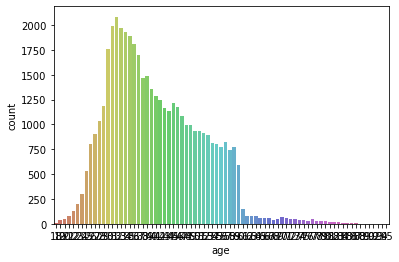

In [10]:
sns.countplot(x="age",data=data,palette='hls')

<AxesSubplot:xlabel='age', ylabel='balance'>

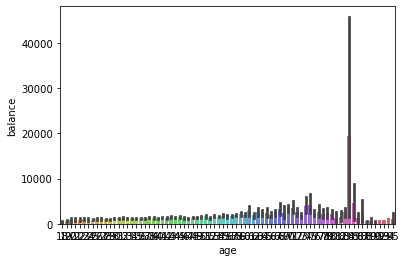

In [11]:
sns.barplot(x="age",y="balance",data=data,palette='hls')

In [20]:
X=data.iloc[:,0:41]
Y=data.iloc[:,42]

In [21]:
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\SATHISH KUMAR K\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred=classifier.predict(X)

In [23]:
print(y_pred)

[0 0 0 ... 1 0 0]


In [40]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})
y_pred_df


,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39155   767]
 [ 4181  1108]]


In [36]:
((39155+1108)/(39155+1108+767+4181))*100

89.05576076618522

In [37]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.62     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

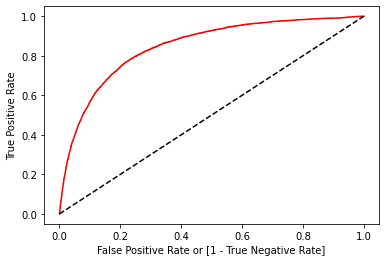

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [42]:
data["y_pred"]=y_pred

In [43]:
classifier.coef_
classifier.predict_proba(X)

array([[0.95540111, 0.04459889],
       [0.9730982 , 0.0269018 ],
       [0.97862756, 0.02137244],
       ...,
       [0.43275816, 0.56724184],
       [0.92244079, 0.07755921],
       [0.88376003, 0.11623997]])

In [46]:
y_prob=pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_data=pd.concat([data,y_prob],axis=1)
y_prob

,0,1
0,0.955401,0.044599
1,0.973098,0.026902
2,0.978628,0.021372
3,0.977721,0.022279
4,0.877511,0.122489
...,...,...
45206,0.410919,0.589081
45207,0.772666,0.227334
45208,0.432758,0.567242
45209,0.922441,0.077559


In [47]:
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,y_pred
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,1,0,1,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [45]:
new_data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,y_pred,0,1
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.955401,0.044599
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.973098,0.026902
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0.978628,0.021372
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0.977721,0.022279
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.877511,0.122489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,1,0,0,0,0,1,1,1,0.410919,0.589081
45207,71,1729,17,456,2,-1,0,0,0,0,...,1,0,0,0,0,1,1,0,0.772666,0.227334
45208,72,5715,17,1127,5,184,3,0,0,0,...,1,0,0,0,1,0,1,1,0.432758,0.567242
45209,57,668,17,508,4,-1,0,1,0,0,...,1,0,0,0,0,1,0,0,0.922441,0.077559


In [48]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(Y,y_pred)

0.8905576076618522